# <center> APPRENTISSAGE SUPERVISE </center>
## LARTIGUE Auriane & MOUKHLIS Nabil
### 5 SDBD A2

---
### <center> KNN - K plus proches voisins </center>
---

In [8]:
from sklearn import cluster
from sklearn import metrics
from sklearn.datasets import fetch_openml 
from sklearn import datasets 
import matplotlib.pyplot as plt 

In [6]:
# Manipulation de la base de données

# print(mnist)
# print (mnist.data)
# print (mnist.target)
# len(mnist.data) 
# help(len)
# print (mnist.data.shape) 
# print (mnist.target.shape) 
# print(mnist.data.values[0]) 
# print(mnist.target[0]) 
# mnist.data.values[0][1]
# print(len(mnist.data.values[:,1])) 
# mnist.data

In [9]:
# Charger le jeu de données mnist
mnist = fetch_openml('mnist_784') # Utiliser mnist_784
mnist = datasets.fetch_openml('mnist_784')
# mnist = datasets.fetch_openml('mnist_784',as_frame=False)


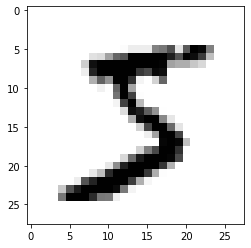

5


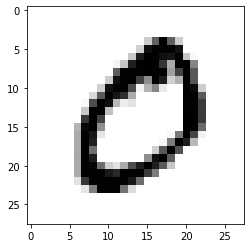

0


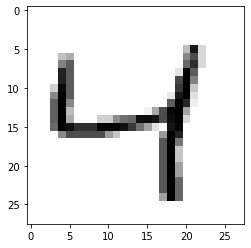

4


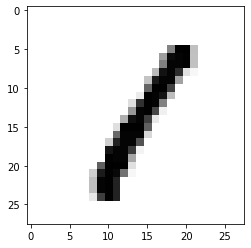

1


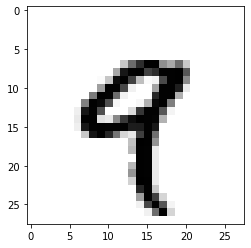

9


In [40]:
images = mnist.data.values.reshape((-1, 28, 28))
for i in range(5):
    plt.imshow(images[i],cmap=plt.cm.gray_r,interpolation="nearest") 
    plt.show()
    print(mnist.target[i]) # 

['7']
Target:  7
Score Test:  0.919
Score Train:  0.93725


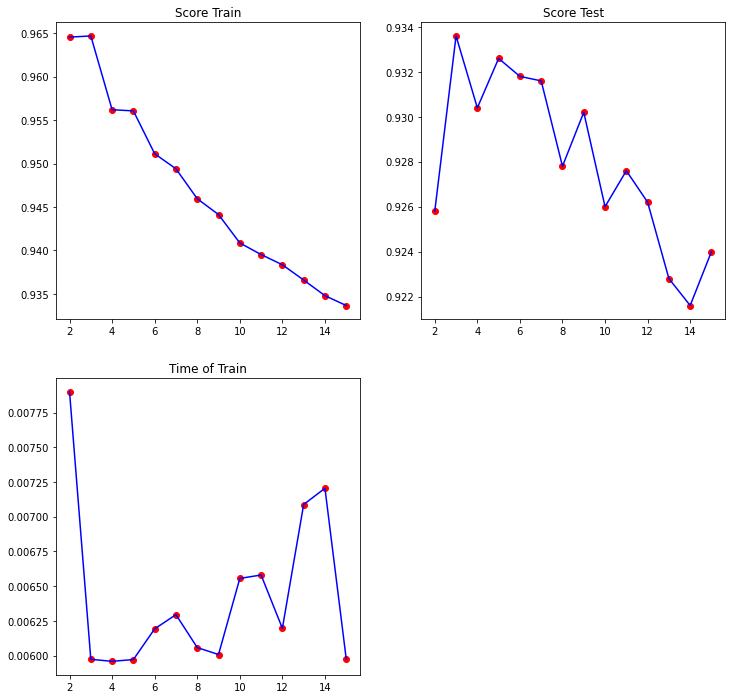

In [11]:
from sklearn import neighbors
from sklearn import model_selection
import numpy as np
import time

# Prendre un échantillon de données appelé data avec une taille de 5000 exemples 
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]

# Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.8)

# Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé
n_neighbors=10
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(xtrain,ytrain)

# Afficher la classe de l’image 4 et sa classe prédite
print(clf.predict([data[4]]))
print("Target: ",target.values[4])

# Afficher le score sur l’échantillon de test
print("Score Test: ",clf.score(xtest, ytest))
print("Score Train: ",clf.score(xtrain, ytrain))

# Faire varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score
scores_k_train=[]
scores_k_test=[]
times_k_train=[]
nb_splits=10
for k in range(2,16):
    kf = model_selection.KFold(n_splits=nb_splits, shuffle=True)
    score_train=0
    score_test=0
    time_train=0
    for train_index, test_index in kf.split(data): #On boucle sur les différents folds
        X_train, X_test = data[train_index], data[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]
        clf = neighbors.KNeighborsClassifier(k)
        train_start=time.time() # On mesure la durée du training
        clf.fit(X_train,Y_train)
        train_end = time.time() 
        time_train = time_train + (train_end - train_start)
        score_test = score_test + clf.score(X_test,Y_test)
        score_train = score_train + clf.score(X_train,Y_train)
    scores_k_train.append(score_train/nb_splits)
    scores_k_test.append(score_test/nb_splits)
    times_k_train.append(time_train/nb_splits)

# Graphique des scores selon le nombre de voisins choisi
plt.figure(figsize=(12,12))
plt.subplot(221,title="Score Train")
plt.plot(range(2,16),scores_k_train,c="blue")
plt.scatter(range(2,16),scores_k_train,c="red")
plt.subplot(222,title="Score Test")
plt.plot(range(2,16),scores_k_test,c="blue")
plt.scatter(range(2,16),scores_k_test,c="red")
plt.subplot(223,title="Time of Train")
plt.plot(range(2,16),times_k_train,c="blue")
plt.scatter(range(2,16),times_k_train,c="red")
plt.show()        
    

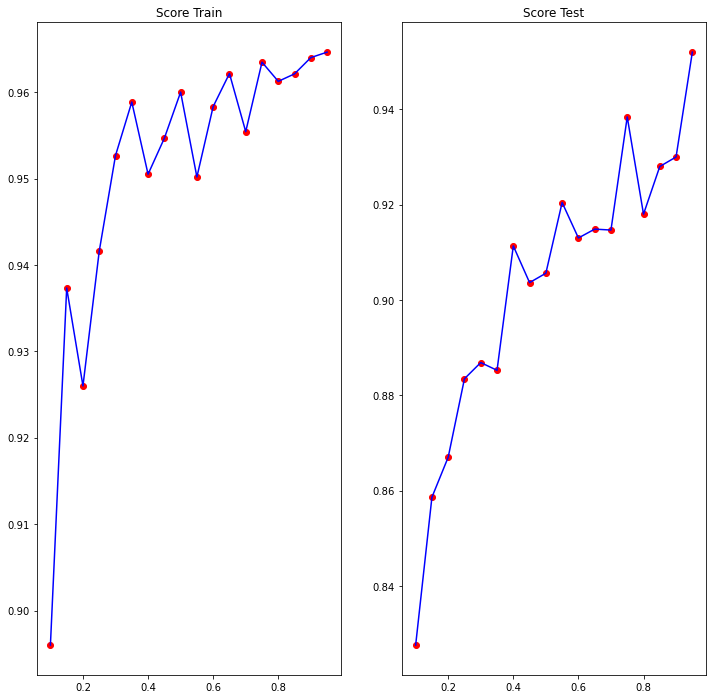

In [12]:
# Faites varier le pourcentage des échantillons (training et test) et affichez le score
scores_nb_splits_train=[]
scores_nb_splits_test=[]
nb_neigbors=3
ratios=[x/100.0 for x in range(10,100,5)]
for train_ratio in ratios:
    xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=train_ratio)
    clf = neighbors.KNeighborsClassifier(nb_neigbors)
    clf.fit(xtrain,ytrain)
    scores_nb_splits_test.append(clf.score(xtest, ytest))
    scores_nb_splits_train.append(clf.score(xtrain, ytrain))

# Graphique des scores selon le pourcentage des échantillons choisi
plt.figure(figsize=(12,12))
plt.subplot(121,title="Score Train")
plt.plot(ratios,scores_nb_splits_train,c="blue")
plt.scatter(ratios,scores_nb_splits_train,c="red")
plt.subplot(122,title="Score Test")
plt.plot(ratios,scores_nb_splits_test,c="blue")
plt.scatter(ratios,scores_nb_splits_test,c="red")
plt.show()

In [18]:
ratios=[x/100.0 for x in range(10,100,5)]
print(ratios)

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


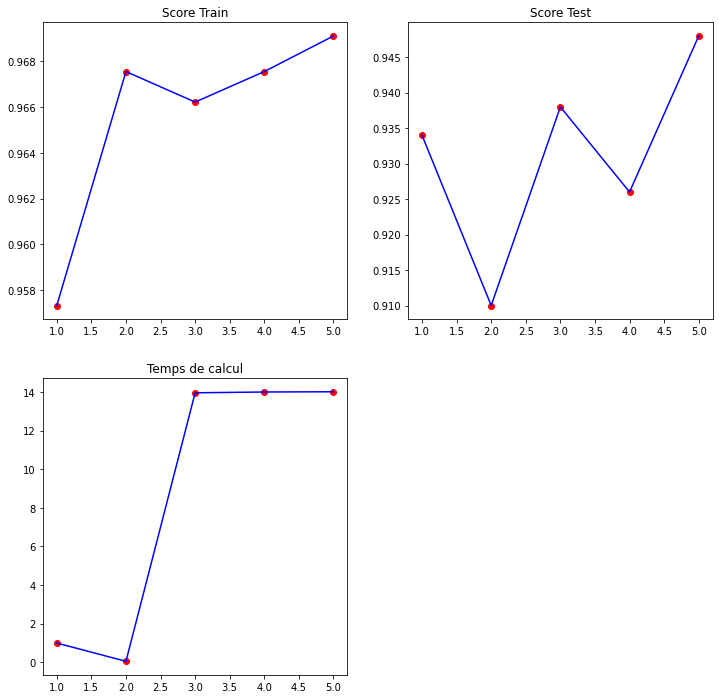

In [61]:
# Faites varier les types de distances (p)
scores_p_train=[]
scores_p_test=[]
times_p=[]
nb_neigbors=3
pmax=6
for dist in range(1,pmax):
    xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.90)
    clf = neighbors.KNeighborsClassifier(nb_neigbors,p=dist)
    start=time.time()
    clf.fit(xtrain,ytrain)
    clf.predict(xtest)
    end=time.time()
    scores_p_test.append(clf.score(xtest, ytest))
    scores_p_train.append(clf.score(xtrain, ytrain))
    times_p.append(end-start)

# Graphique des scores selon le type de distances (p) choisi
plt.figure(figsize=(12,12))
plt.subplot(221,title="Score Train")
plt.scatter(range(1,pmax),scores_p_train,c="red")
plt.plot(range(1,pmax),scores_p_train,c="blue")
plt.subplot(222,title="Score Test")
plt.scatter(range(1,pmax),scores_p_test,c="red")
plt.plot(range(1,pmax),scores_p_test,c="blue")
plt.subplot(223,title="Temps de calcul")
plt.scatter(range(1,pmax),times_p,c="red")
plt.plot(range(1,pmax),times_p,c="blue")
plt.show()

In [60]:
# Fixez n_job à  1 puis à -1 et calculez le temps de chacun. 
import time

time_jobs_test=[]
time_jobs_train=[]
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.90)
nb_splits=10
for jobs in [-1,1]:    
    kf = model_selection.KFold(n_splits=nb_splits, shuffle=True)
    score_train=0
    score_test=0
    time_train=0
    for train_index, test_index in kf.split(data): #On boucle sur les différents folds
        X_train, X_test = data[train_index], data[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]
        
        clf = neighbors.KNeighborsClassifier(3,n_jobs=jobs)
        train_start=time.time() # On mesure la durée du training
        clf.fit(X_train,Y_train)
        clf.predict(X_test)
        train_end = time.time()
        
        time_train = time_train + (train_end - train_start)
    time_jobs_train.append(time_train)
    print(jobs,time_train)
# Affichage des temps de calculs
print ('job = -1: train ' , time_jobs_train[0]  )
print ('job = 1 : train ' , time_jobs_train[1]  )

-1 2.1190009117126465
1 0.5000615119934082
job = -1: train  2.1190009117126465
job = 1 : train  0.5000615119934082


---
### <center> ANN - Réseaux de neuronnes artificiels </center>
---

In [28]:
from sklearn import neighbors
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
# On conserve le même échantillon qu'au TP précedent afin de pouvoir conserver les différentes méthodes
# Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests
percentage = 49000/len(mnist.data) # = 70%
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,target, train_size=percentage)
clf = MLPClassifier(hidden_layer_sizes=(50)).fit(xtrain,ytrain)
print("Précision du train set:",clf.score(xtrain,ytrain))
print("Précision du test set:",clf.score(xtest,ytest))

Précision du train set: 0.998
Précision du test set: 0.8393333333333334


In [24]:
# Afficher la classe de l’image 4 et sa classe prédite
print(clf.predict([data[4]]))
print("Target: ",target.values[4])

['7']
Target:  7


In [25]:
# Calculez la précision en utilisant le package precision_score
from sklearn.metrics import precision_score
precision_score(clf.predict(data),target.values,average='micro')

0.94

In [29]:
# Varier le nombre de couches entre (2 et 100) de taille de 50 neuronnes
precisions = []

for i in range(2,10):
    layers=tuple([10 for k in range(i)])
    clf = MLPClassifier(hidden_layer_sizes=layers,max_iter=50).fit(xtrain,ytrain)
    # Recalculer la précision du classifieur
    precisions.append(precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro'))
  


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilaye

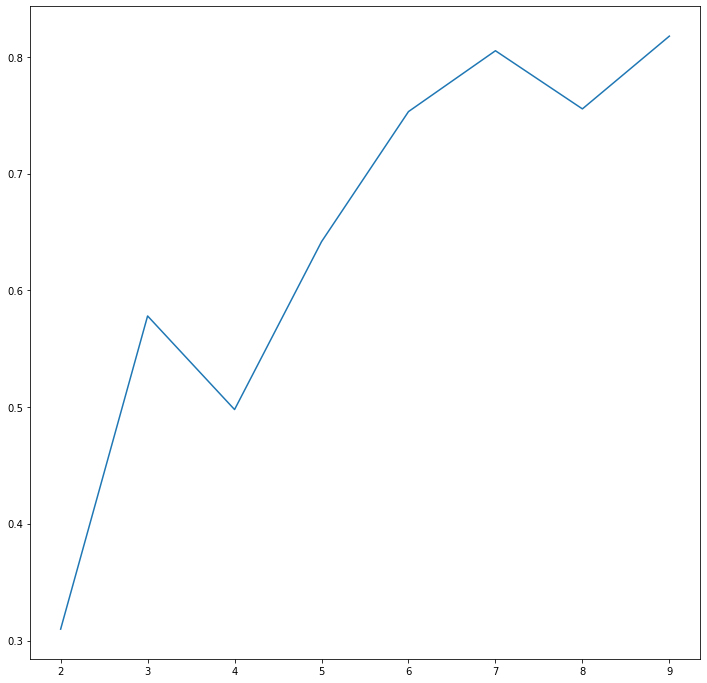

In [31]:
plt.figure(figsize=(12,12))
plt.plot(range(2,10),precisions)
plt.show()

In [5]:
import random
import time
# Construire cinq modèles de classification des données mnist, avec des 
# réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de 
#couches entre 10 et 300 neurones au choix d’une façon aléatoire.
classifiers = []
for i in range(5):
    nb_layers=random.randint(2,11)
    layers=[random.randint(10,300) for k in range(1,nb_layers) ]
    start = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro')
    classifiers.append((layers,score,end-start))
    print((layers,score,end-start))

([109, 88, 37, 243, 10, 218, 251, 178, 21], 0.9915714285714285, 82.64188313484192)
([145, 236, 171, 160, 299, 238, 89, 261, 133], 0.9930428571428571, 150.31364965438843)
([249, 112, 165, 174], 0.9914428571428572, 105.279776096344)
([161, 98], 0.9892428571428571, 46.27161407470703)
([57, 118, 62, 231, 50, 287, 147, 91], 0.9898285714285714, 86.85731267929077)


In [9]:
solvers=['lbfgs','sgd','adam']
for s in solvers:
    clf = MLPClassifier(hidden_layer_sizes=(50),solver=s,verbose=True).fit(xtrain,ytrain)

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [10]:
from sklearn.metrics import zero_one_loss
acti_functions=['identity','logistic','tanh','relu']
for af in acti_functions:
    clf = MLPClassifier(hidden_layer_sizes=(50),activation=af,verbose=True).fit(xtrain,ytrain)
    print('Score ' + af + ' = ' , precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro'))

Iteration 1, loss = 5.12432604
Iteration 2, loss = 3.11382763
Iteration 3, loss = 2.77062143
Iteration 4, loss = 2.58150293
Iteration 5, loss = 2.32947792
Iteration 6, loss = 2.12956560
Iteration 7, loss = 1.97758636
Iteration 8, loss = 1.75494380
Iteration 9, loss = 1.62262913
Iteration 10, loss = 1.40180611
Iteration 11, loss = 1.23967361
Iteration 12, loss = 1.09261023
Iteration 13, loss = 0.94491906
Iteration 14, loss = 0.79946437
Iteration 15, loss = 0.68724475
Iteration 16, loss = 0.57329514
Iteration 17, loss = 0.48451757
Iteration 18, loss = 0.45613189
Iteration 19, loss = 0.38340537
Iteration 20, loss = 0.35745114
Iteration 21, loss = 0.33601387
Iteration 22, loss = 0.31944609
Iteration 23, loss = 0.31019171
Iteration 24, loss = 0.30865019
Iteration 25, loss = 0.31062166
Iteration 26, loss = 0.30740008
Iteration 27, loss = 0.30686139
Iteration 28, loss = 0.31164477
Iteration 29, loss = 0.30985454
Iteration 30, loss = 0.31219526
Iteration 31, loss = 0.30793200
Iteration 32, los

Iteration 21, loss = 0.15400801
Iteration 22, loss = 0.14908929
Iteration 23, loss = 0.14553805
Iteration 24, loss = 0.13363009
Iteration 25, loss = 0.13509321
Iteration 26, loss = 0.13170950
Iteration 27, loss = 0.12849391
Iteration 28, loss = 0.13159094
Iteration 29, loss = 0.12017272
Iteration 30, loss = 0.11629805
Iteration 31, loss = 0.11616062
Iteration 32, loss = 0.11005323
Iteration 33, loss = 0.10897443
Iteration 34, loss = 0.10523554
Iteration 35, loss = 0.10198109
Iteration 36, loss = 0.10884322
Iteration 37, loss = 0.10095069
Iteration 38, loss = 0.09438585
Iteration 39, loss = 0.09853098
Iteration 40, loss = 0.09937202
Iteration 41, loss = 0.08864923
Iteration 42, loss = 0.09114114
Iteration 43, loss = 0.08837022
Iteration 44, loss = 0.08622646
Iteration 45, loss = 0.08398936
Iteration 46, loss = 0.08000020
Iteration 47, loss = 0.08514488
Iteration 48, loss = 0.08112737
Iteration 49, loss = 0.07897337
Iteration 50, loss = 0.07730058
Iteration 51, loss = 0.07277194
Iteratio

In [26]:
alphas=[x/10000 for x in range(1,1000,100)]
alphas=[0.000001]
for a in alphas:
    clf = MLPClassifier(hidden_layer_sizes=(50),alpha=a).fit(xtrain,ytrain)
    print("Alpha: ",a)
    print("Précision du train set:",clf.score(xtrain,ytrain))
    print("Précision du test set:",clf.score(xtest,ytest))
    print("")

    

Alpha:  1e-06
Précision du train set: 0.9888367346938776
Précision du test set: 0.9511904761904761



In [27]:
from sklearn.metrics import zero_one_loss
clf = MLPClassifier(hidden_layer_sizes=(50)).fit(xtrain,ytrain)
print('Score Zero One Loss = ' , zero_one_loss(clf.predict(mnist.data.values),mnist.target.values))

Score Zero One Loss =  0.019657142857142818


## TP 3 ##

In [3]:
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn import model_selection
import numpy as np
#Importer MNIST
mnist = fetch_openml('mnist_784')
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]

#Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)

clsvm = svm.SVC(kernel='linear')
clsvm.fit(xtrain,ytrain)



SVC(kernel='linear')

In [11]:
from sklearn.metrics import precision_score
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.9748
Précision du train set: 1.0
Précision du test set: 0.916


In [12]:
clsvm = svm.SVC(kernel='poly')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.9662
Précision du train set: 0.9817142857142858
Précision du test set: 0.93


In [13]:
clsvm = svm.SVC(kernel='rbf')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.974
Précision du train set: 0.9848571428571429
Précision du test set: 0.9486666666666667


In [14]:
clsvm = svm.SVC(kernel='sigmoid')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.8568
Précision du train set: 0.8554285714285714
Précision du test set: 0.86


In [15]:
clsvm = svm.SVC(kernel='precomputed')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

ValueError: Precomputed matrix must be a square matrix. Input is a 3500x784 matrix.

Temps d'apprentissage:  1.466259241104126
Precision score:  0.9084
Précision du train set: 0.9105714285714286
Précision du test set: 0.9033333333333333
Recall:  0.9084
Temps d'apprentissage:  0.9447593688964844
Precision score:  0.9464
Précision du train set: 0.9525714285714286
Précision du test set: 0.932
Recall:  0.9464
Temps d'apprentissage:  0.812793493270874
Precision score:  0.9598
Précision du train set: 0.9665714285714285
Précision du test set: 0.944
Recall:  0.9598
Temps d'apprentissage:  0.7602639198303223
Precision score:  0.9692
Précision du train set: 0.9788571428571429
Précision du test set: 0.9466666666666667
Recall:  0.9692
Temps d'apprentissage:  0.7264344692230225
Precision score:  0.974
Précision du train set: 0.9848571428571429
Précision du test set: 0.9486666666666667
Recall:  0.974


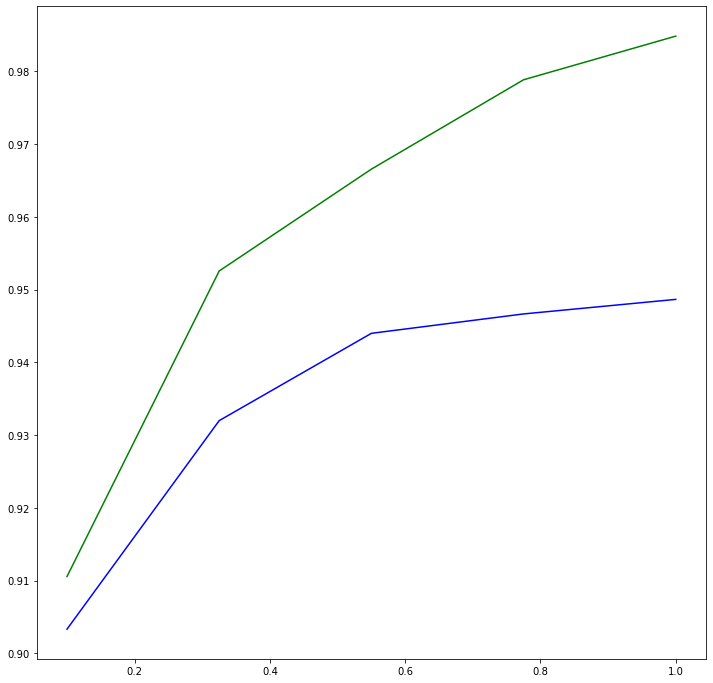

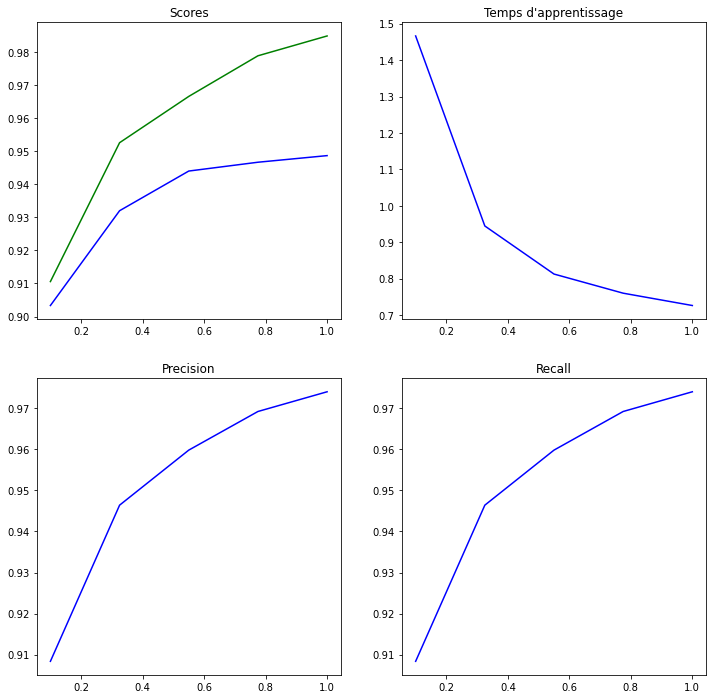

In [25]:
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import recall_score
train_scores=[]
test_scores=[]
appr_time=[]
recalls=[]
precisions=[]
intervalle=np.linspace(0.1, 1, num=5)
for c in intervalle:
    clsvm = svm.SVC(kernel='rbf',C=c)
    start=time.time()
    clsvm.fit(xtrain,ytrain)
    end=time.time()
    appr_time.append(end-start)
    print("Temps d'apprentissage: ",end-start)
    precision=precision_score(target,clsvm.predict(data),average='micro')
    print("Precision score: ",precision)
    precisions.append(precision)
    print("Précision du train set:",clsvm.score(xtrain,ytrain))
    train_scores.append(clsvm.score(xtrain,ytrain))
    print("Précision du test set:",clsvm.score(xtest,ytest))
    test_scores.append(clsvm.score(xtest,ytest))
    recall = recall_score(target,clsvm.predict(data),average='micro')
    recalls.append(recall)
    print("Recall: ", recall)
        

plt.figure(figsize=(12,12))
plt.plot(intervalle,train_scores,"green")
plt.plot(intervalle,test_scores,"blue")
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(221,title="Scores")
plt.plot(intervalle,train_scores,"green")
plt.plot(intervalle,test_scores,"blue")
plt.subplot(222,title="Temps d'apprentissage")
plt.plot(intervalle,appr_time,"blue")
plt.subplot(223,title="Precision")
plt.plot(intervalle,precisions,"blue")
plt.subplot(224,title="Recall")
plt.plot(intervalle,recalls,"blue")
plt.show()


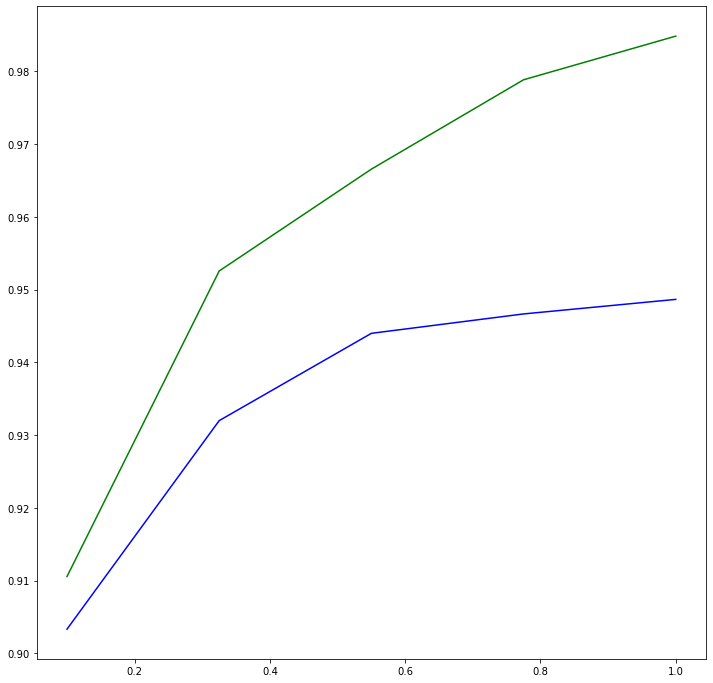

In [19]:
plt.figure(figsize=(12,12))
plt.plot(intervalle,train_scores,"green")
plt.plot(intervalle,test_scores,"blue")
plt.show()  

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, clsvm.predict(data)) 
print(cm)

[[511   0   0   0   0   1   3   0   1   0]
 [  0 524   0   2   1   1   0   0   1   0]
 [  1   1 523   1   3   0   1   3   2   2]
 [  0   0   2 502   0   8   1   2   3   1]
 [  0   1   1   0 489   0   1   0   0   3]
 [  0   0   1   5   2 411   1   0   2   0]
 [  2   1   0   0   0   4 488   0   0   0]
 [  1   6   4   1   2   0   0 504   0  10]
 [  0   4   3   3   1   1   2   0 511   1]
 [  0   1   1   8   6   1   1   3   5 407]]
